In [ ]:
import pandas as pd

# Load the CSV file to examine its structure and contents
#file_path = '/mnt/data/data.csv'
data = pd.read_csv('/content/data.csv')

# Display the first few rows of the data and column names for inspection
data.head(), data.columns


(                                               Title  \
 0           Guide for Personal Wise Account Creation   
 1                            How to get my WISE tag?   
 2  Can I use the email address registered on my W...   
 3           Guide for Personal Wise Account Creation   
 4                            How to get my WISE tag?   
 
                                              Content  
 0  If you are eligible to create a personal WISE ...  
 1  We have partnered with WISE to distribute rewa...  
 2  Yes, you can use the email address registered ...  
 3  If you are eligible to create a personal WISE ...  
 4  We have partnered with WISE to distribute rewa...  ,
 Index(['Title', 'Content'], dtype='object'))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

# Split the data into training and testing sets
X = data['Title']
y = data['Content']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a TF-IDF vectorizer to transform the text data
tfidf_vectorizer = TfidfVectorizer()

# Define individual models for the ensemble
log_reg = LogisticRegression(max_iter=1000)
svc = SVC(probability=True, kernel='linear')
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an ensemble model with VotingClassifier (Soft Voting for probability estimates)
ensemble_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('svc', svc), ('rf', rf_clf)], voting='soft'
)

# Create a pipeline to vectorize and then classify
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('ensemble', ensemble_clf)
])

# Train the ensemble model on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.4444444444444444

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize individual classifiers to test each one independently
log_reg.fit(tfidf_vectorizer.fit_transform(X_train), y_train)
svc.fit(tfidf_vectorizer.fit_transform(X_train), y_train)
rf_clf.fit(tfidf_vectorizer.fit_transform(X_train), y_train)
gb_clf = GradientBoostingClassifier().fit(tfidf_vectorizer.fit_transform(X_train), y_train)

# Predict and calculate accuracy for each model
log_reg_pred = log_reg.predict(tfidf_vectorizer.transform(X_test))
svc_pred = svc.predict(tfidf_vectorizer.transform(X_test))
rf_pred = rf_clf.predict(tfidf_vectorizer.transform(X_test))
gb_pred = gb_clf.predict(tfidf_vectorizer.transform(X_test))

# Calculate accuracy for each classifier
accuracies = {
    "Logistic Regression": accuracy_score(y_test, log_reg_pred),
    "Support Vector Machine": accuracy_score(y_test, svc_pred),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "Gradient Boosting": accuracy_score(y_test, gb_pred),
    "Ensemble (Voting Classifier)": accuracy,
}

# Convert to DataFrame for easy display
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=["Model", "Accuracy"])

# Correlation matrix for model predictions
# predictions_df = pd.DataFrame({
#     "Logistic Regression": log_reg_pred,
#     "Support Vector Machine": svc_pred,
#     "Random Forest": rf_pred,
#     "Gradient Boosting": gb_pred,
#     "Ensemble": y_pred
# })

# correlation_matrix = predictions_df.corr()

# # Plot the correlation matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
# plt.title("Correlation Matrix of Model Predictions")
# plt.show()

accuracy_df


,Model,Accuracy
0,Logistic Regression,0.407407
1,Support Vector Machine,0.444444
2,Random Forest,0.444444
3,Gradient Boosting,0.444444
4,Ensemble (Voting Classifier),0.444444


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Step 1: Preprocess the data and split into train/test sets
X = data['Title']  # Questions
y = data['Content']  # Answers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize different models
models = {
    'SVM': make_pipeline(TfidfVectorizer(), SVC(probability=True, random_state=42)),
    'Naive Bayes': make_pipeline(TfidfVectorizer(), MultinomialNB()),
    'Random Forest': make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42))
}

# Train each model and calculate accuracy
accuracy_results = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

# Step 3: Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('SVM', models['SVM']),
    ('Naive Bayes', models['Naive Bayes']),
    ('Random Forest', models['Random Forest'])
], voting='soft')

# Train ensemble model and calculate accuracy
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
accuracy_results['Ensemble'] = ensemble_accuracy

# Convert accuracy results to a DataFrame for easier readability
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])
accuracy_df


,Model,Accuracy
0,SVM,0.444444
1,Naive Bayes,0.407407
2,Random Forest,0.444444
3,Ensemble,0.444444


In [ ]:
# Function to take user input and respond based on ensemble model predictions
def chatbot_response(input_text):
    response = ensemble_model.predict([input_text])[0]  # Predict answer based on the ensemble model
    return response

# Example interaction loop - This would typically go in a console interaction loop
# Uncomment the following lines to enable a continuous interaction in an interactive environment:
while True:
    user_input = input("You: ")
    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break
    response = chatbot_response(user_input)
    print(f"Chatbot: {response}")

# Example response for a sample input
sample_input = "How to get my WISE tag?"
sample_response = chatbot_response(sample_input)
sample_response


You: How to get wise tag
Chatbot: We have partnered with WISE to distribute rewards in your local currency directly through your bank. To receive your rewards:

Create a personal WISE account.
Complete the verification process.
Obtain your WISE tag (if available in your region).
Enter your WISE email address and your WISE tag (if available in your region) in the payment section of your StackUp Earn account.

FAQs
• How to get my WISE tag?
Register for a personal WISE account here.
• I already have a WISE account. Where can I find my WISE tag?

• How do I enable my WISE tag?  On the WISE platform, go to Payments, click on Your Wisetag and click Get your Wisetag. This is how you can enable your WISE tag. Once you obtain it, copy and paste it onto your StackUp Earn's finance page as shown below.
Important note: You won’t be able to edit your WISE email address or WISE tag on your own. If you need to make changes, please send a request to the StackUp team by opening a ticket. Therefore, en

"We have partnered with WISE to distribute rewards in your local currency directly through your bank. To receive your rewards:\n\nCreate a personal WISE account.\nComplete the verification process.\nObtain your WISE tag (if available in your region).\nEnter your WISE email address and your WISE tag (if available in your region) in the payment section of your StackUp Earn account.\n\nFAQs\n• How to get my WISE tag?\nRegister for a personal WISE account here.\n• I already have a WISE account. Where can I find my WISE tag?\n\n• How do I enable my WISE tag?  On the WISE platform, go to\xa0Payments,\xa0click on\xa0Your Wisetag\xa0and click\xa0Get your Wisetag. This is how you can enable your WISE tag. Once you obtain it, copy and paste it onto your StackUp Earn's finance page as shown below.\nImportant note:\xa0You won’t be able to edit your WISE email address or WISE tag on your own. If you need to make changes, please send a request to the StackUp team by opening a ticket. Therefore, ensu

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Step 1: Improved TF-IDF vectorizer with bigram inclusion and stopwords removal
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_df=0.9)

# Updated models with hyperparameter tuning
# 1. SVM with grid search for hyperparameter tuning
svm_pipeline = make_pipeline(tfidf_vectorizer, SVC(probability=True, random_state=42))
svm_params = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=3)
svm_grid.fit(X_train, y_train)

# 2. Naive Bayes (multinomial)
nb_pipeline = make_pipeline(tfidf_vectorizer, MultinomialNB(alpha=0.1))  # optimized alpha

# 3. Gradient Boosting
gb_pipeline = make_pipeline(tfidf_vectorizer, GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1))

# Train each tuned/optimized model and calculate accuracy
tuned_models = {
    'SVM': svm_grid.best_estimator_,
    'Naive Bayes': nb_pipeline,
    'Gradient Boosting': gb_pipeline
}

tuned_accuracy_results = {}

for model_name, model in tuned_models.items():
    # Train model
    model.fit(X_train, y_train)
    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tuned_accuracy_results[model_name] = accuracy

# Step 3: Create an optimized ensemble model using VotingClassifier with tuned models
optimized_ensemble_model = VotingClassifier(estimators=[
    ('SVM', tuned_models['SVM']),
    ('Naive Bayes', tuned_models['Naive Bayes']),
    ('Gradient Boosting', tuned_models['Gradient Boosting'])
], voting='soft')

# Train optimized ensemble model and calculate accuracy
optimized_ensemble_model.fit(X_train, y_train)
optimized_ensemble_pred = optimized_ensemble_model.predict(X_test)
optimized_ensemble_accuracy = accuracy_score(y_test, optimized_ensemble_pred)
tuned_accuracy_results['Ensemble'] = optimized_ensemble_accuracy

# Convert accuracy results to a DataFrame for easier readability
tuned_accuracy_df = pd.DataFrame(list(tuned_accuracy_results.items()), columns=['Model', 'Accuracy'])
tuned_accuracy_df


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


,Model,Accuracy
0,SVM,0.444444
1,Naive Bayes,0.444444
2,Gradient Boosting,0.444444
3,Ensemble,0.444444


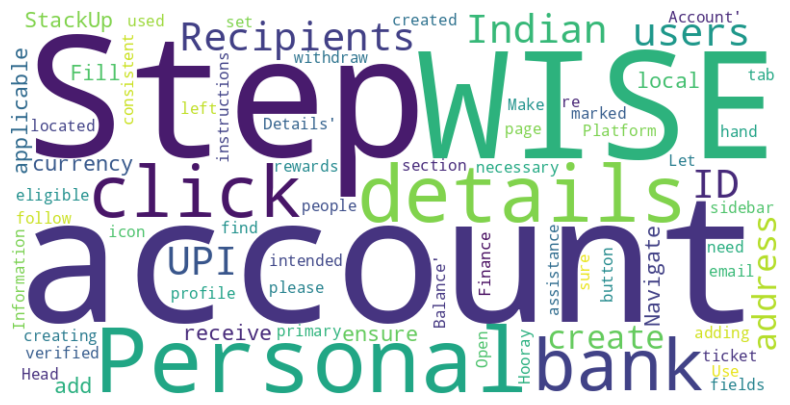

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample content
y = """
If you are eligible to create a personal WISE account, please follow these instructions:
On the Wise Platform: Step 1 - Head over to Create your Wise account Step 2 - Use the same email address you used for your StackUp account when creating a Wise Personal account.
Step 3 - Once your WISE account is created and verified, click on the profile icon and click ‘Personal Details'.
Step 4 - Fill in the details of your "Personal Information" and "Personal Address".
Step 5 - Let's add your bank details! Navigate to the "Recipients" tab located on the left-hand sidebar.
Then, click on "Add Recipients" and fill out all the necessary fields with your local bank account details / UPI ID (applicable for Indian users only).
Step 6 - After adding recipients, ensure that your intended bank account / UPI ID (applicable for Indian users only) is marked as your primary account to receive your currency.
Step 7 - Ensure that your WISE account details and your bank or UPI ID details (for Indian users) are consistent.
Step 8 - Make sure that people can find your account on WISE.
Step 9 - On the StackUp Finance page, click the 'Balance' button and navigate to the 'My WISE Account' section.
Hooray! 🙌 You’re all set to withdraw your rewards and receive them in your local currency. Open a ticket if you need further assistance.
"""

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(y)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


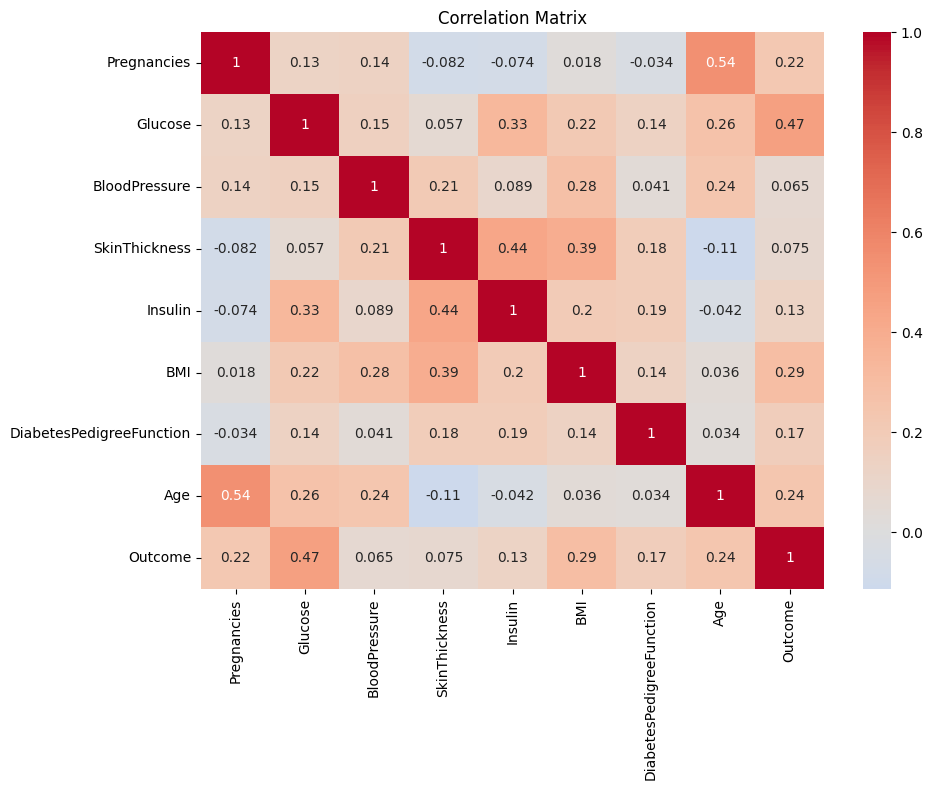

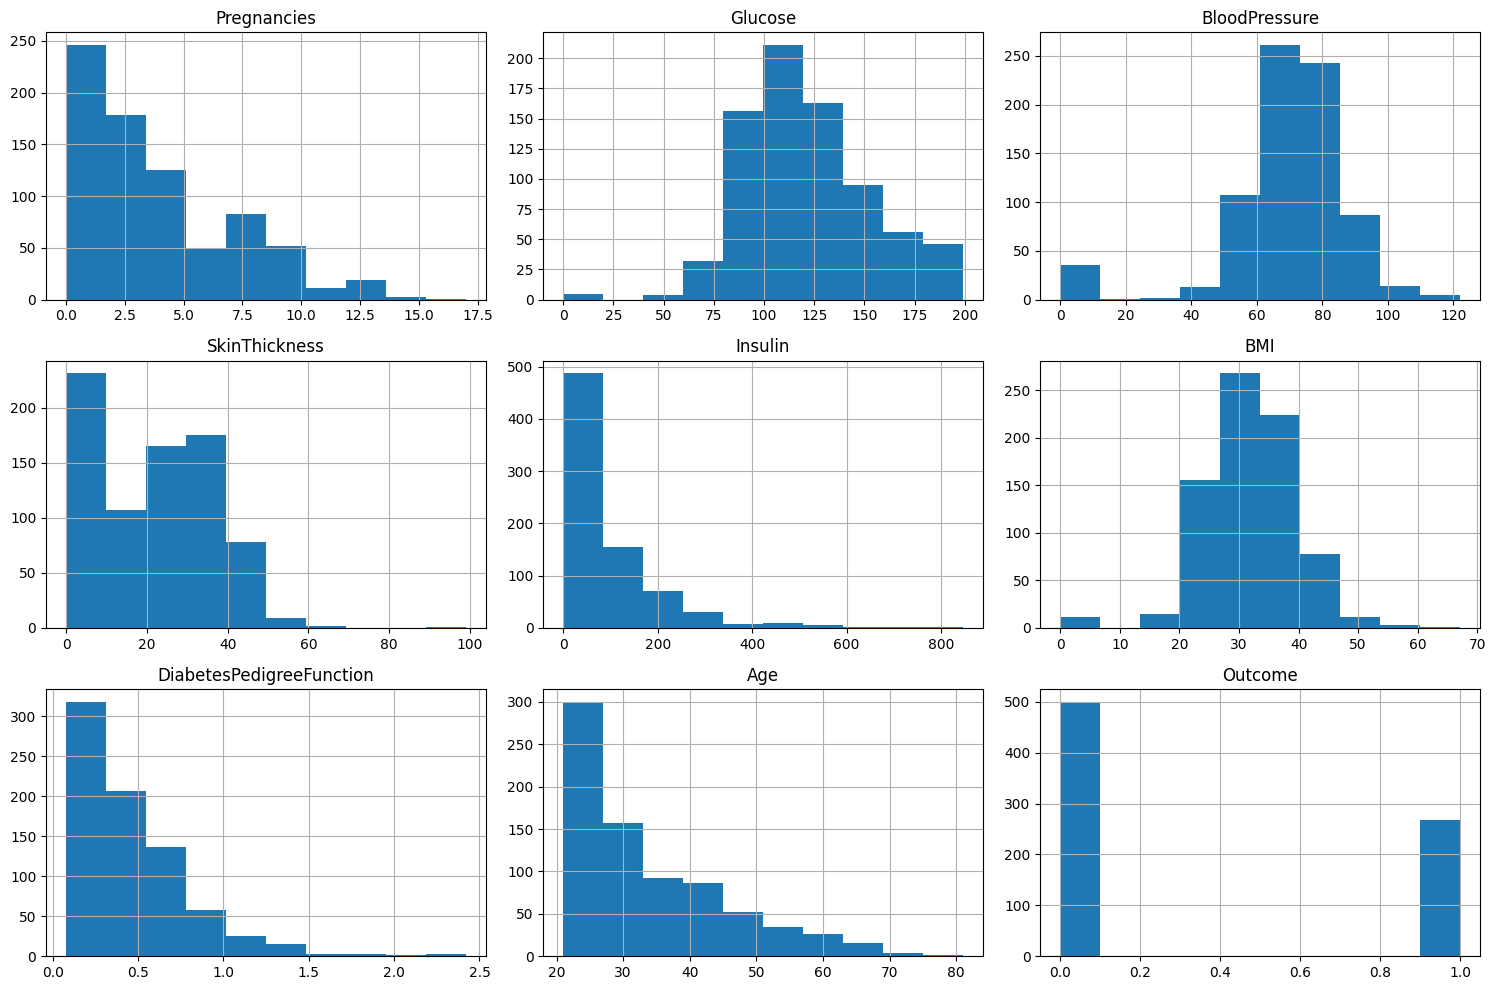

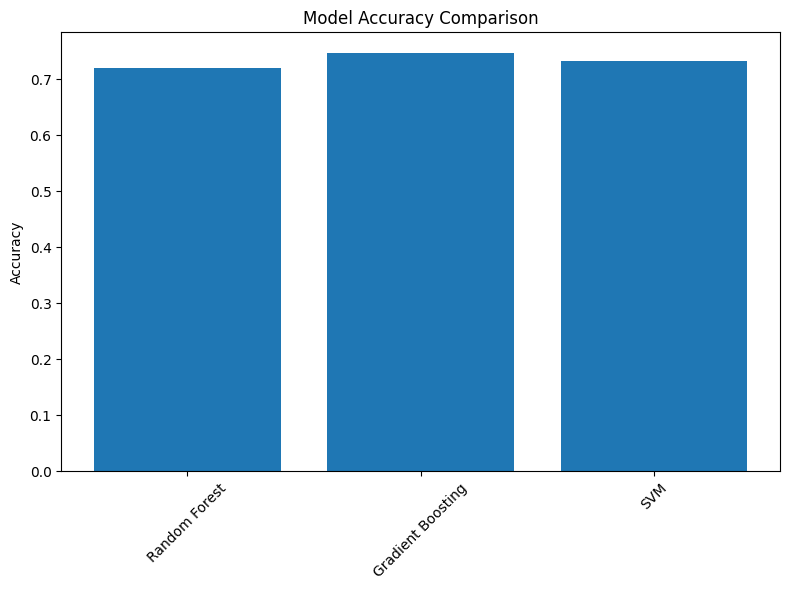

Welcome to the Diabetes Prediction Chatbot!
Please enter your health metrics:
Enter Pregnancies: 1
Enter Glucose: 2
Enter BloodPressure: 8
Enter SkinThickness: 8
Enter Insulin: 
Please enter valid numerical values.

Would you like to make another prediction? (yes/no): no


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


df = pd.read_csv('/content/diabetes.csv')

# Data Preprocessing
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train models and store accuracies
accuracies = {}
trained_models = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    trained_models[name] = model

# Create visualizations
def create_visualizations():
    # Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

    # Feature Distribution
    df.hist(figsize=(15, 10))
    plt.tight_layout()
    plt.show()

    # Model Accuracy Comparison
    plt.figure(figsize=(8, 6))
    plt.bar(accuracies.keys(), accuracies.values())
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Chatbot function
def diabetes_chatbot():
    print("Welcome to the Diabetes Prediction Chatbot!")
    print("Please enter your health metrics:")

    try:
        input_data = {}
        for column in X.columns:
            value = float(input(f"Enter {column}: "))
            input_data[column] = value

        # Convert input to DataFrame and scale
        input_df = pd.DataFrame([input_data])
        input_scaled = scaler.transform(input_df)

        # Make predictions using all models
        predictions = {}
        for name, model in trained_models.items():
            pred = model.predict(input_scaled)[0]
            predictions[name] = pred

        # Calculate ensemble prediction (majority voting)
        ensemble_pred = round(sum(predictions.values()) / len(predictions))

        # Print results
        print("\nPredictions:")
        for name, pred in predictions.items():
            print(f"{name}: {'Diabetic' if pred == 1 else 'Non-diabetic'}")

        print(f"\nEnsemble Prediction: {'Diabetic' if ensemble_pred == 1 else 'Non-diabetic'}")

        # Display accuracies in table format
        headers = ["Model", "Accuracy"]
        table_data = [[model, f"{acc:.2%}"] for model, acc in accuracies.items()]
        print("\nModel Accuracies:")
        print(tabulate(table_data, headers=headers, tablefmt="grid"))

    except ValueError:
        print("Please enter valid numerical values.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Create visualizations
create_visualizations()

# Run the chatbot
if __name__ == "__main__":
    while True:
        diabetes_chatbot()
        if input("\nWould you like to make another prediction? (yes/no): ").lower() != 'yes':
            break

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_models(models, X_train, X_test, y_train, y_test):
    metrics = []

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        metrics.append([
            name,
            f"{accuracy:.3f}",
            f"{precision:.3f}",
            f"{recall:.3f}",
            f"{f1:.3f}"
        ])

    return metrics

# Generate metrics
metrics_data = evaluate_models(models, X_train_scaled, X_test_scaled, y_train, y_test)

# Create and print tables
def print_metrics_tables():
    # Detailed metrics table
    headers = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
    print("\nDetailed Model Performance Metrics:")
    print(tabulate(metrics_data, headers=headers, tablefmt="grid"))

    # Simple accuracy ranking
    accuracy_ranking = sorted(metrics_data, key=lambda x: float(x[1]), reverse=True)
    simplified_ranking = [[i+1, model[0], model[1]] for i, model in enumerate(accuracy_ranking)]
    print("\nModel Accuracy Ranking:")
    print(tabulate(simplified_ranking,
                  headers=["Rank", "Model", "Accuracy"],
                  tablefmt="grid"))

# Print the tables
print_metrics_tables()


Detailed Model Performance Metrics:
+-------------------+------------+-------------+----------+------------+
| Model             |   Accuracy |   Precision |   Recall |   F1-Score |
+===================+============+=============+==========+============+
| Random Forest     |      0.721 |       0.607 |    0.618 |      0.613 |
+-------------------+------------+-------------+----------+------------+
| Gradient Boosting |      0.747 |       0.638 |    0.673 |      0.655 |
+-------------------+------------+-------------+----------+------------+
| SVM               |      0.734 |       0.646 |    0.564 |      0.602 |
+-------------------+------------+-------------+----------+------------+

Model Accuracy Ranking:
+--------+-------------------+------------+
|   Rank | Model             |   Accuracy |
+========+===================+============+
|      1 | Gradient Boosting |      0.747 |
+--------+-------------------+------------+
|      2 | SVM               |      0.734 |
+--------+-------

<ipython-input-10-5eb54cea3485>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-10-5eb54cea3485>:59: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 4)


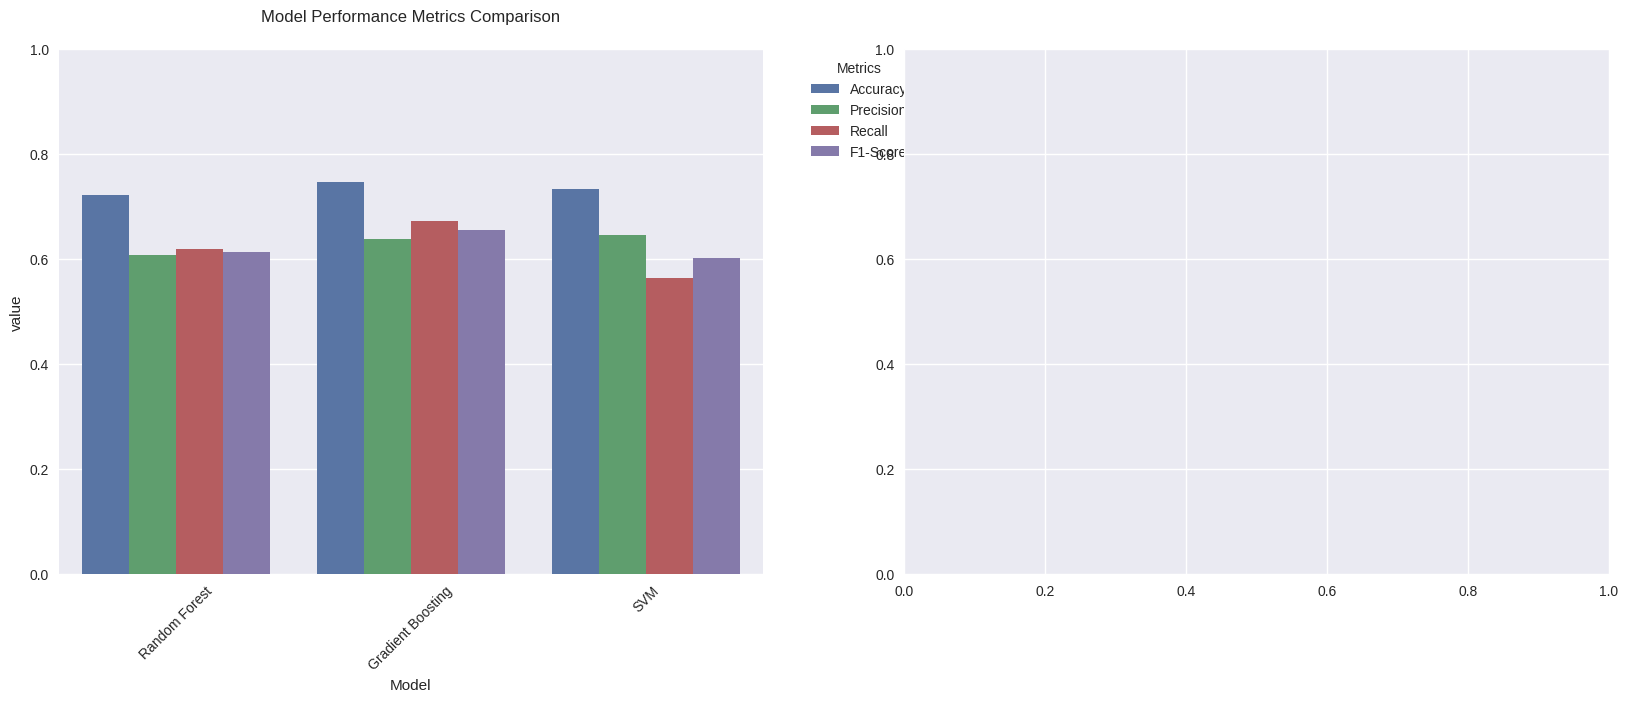

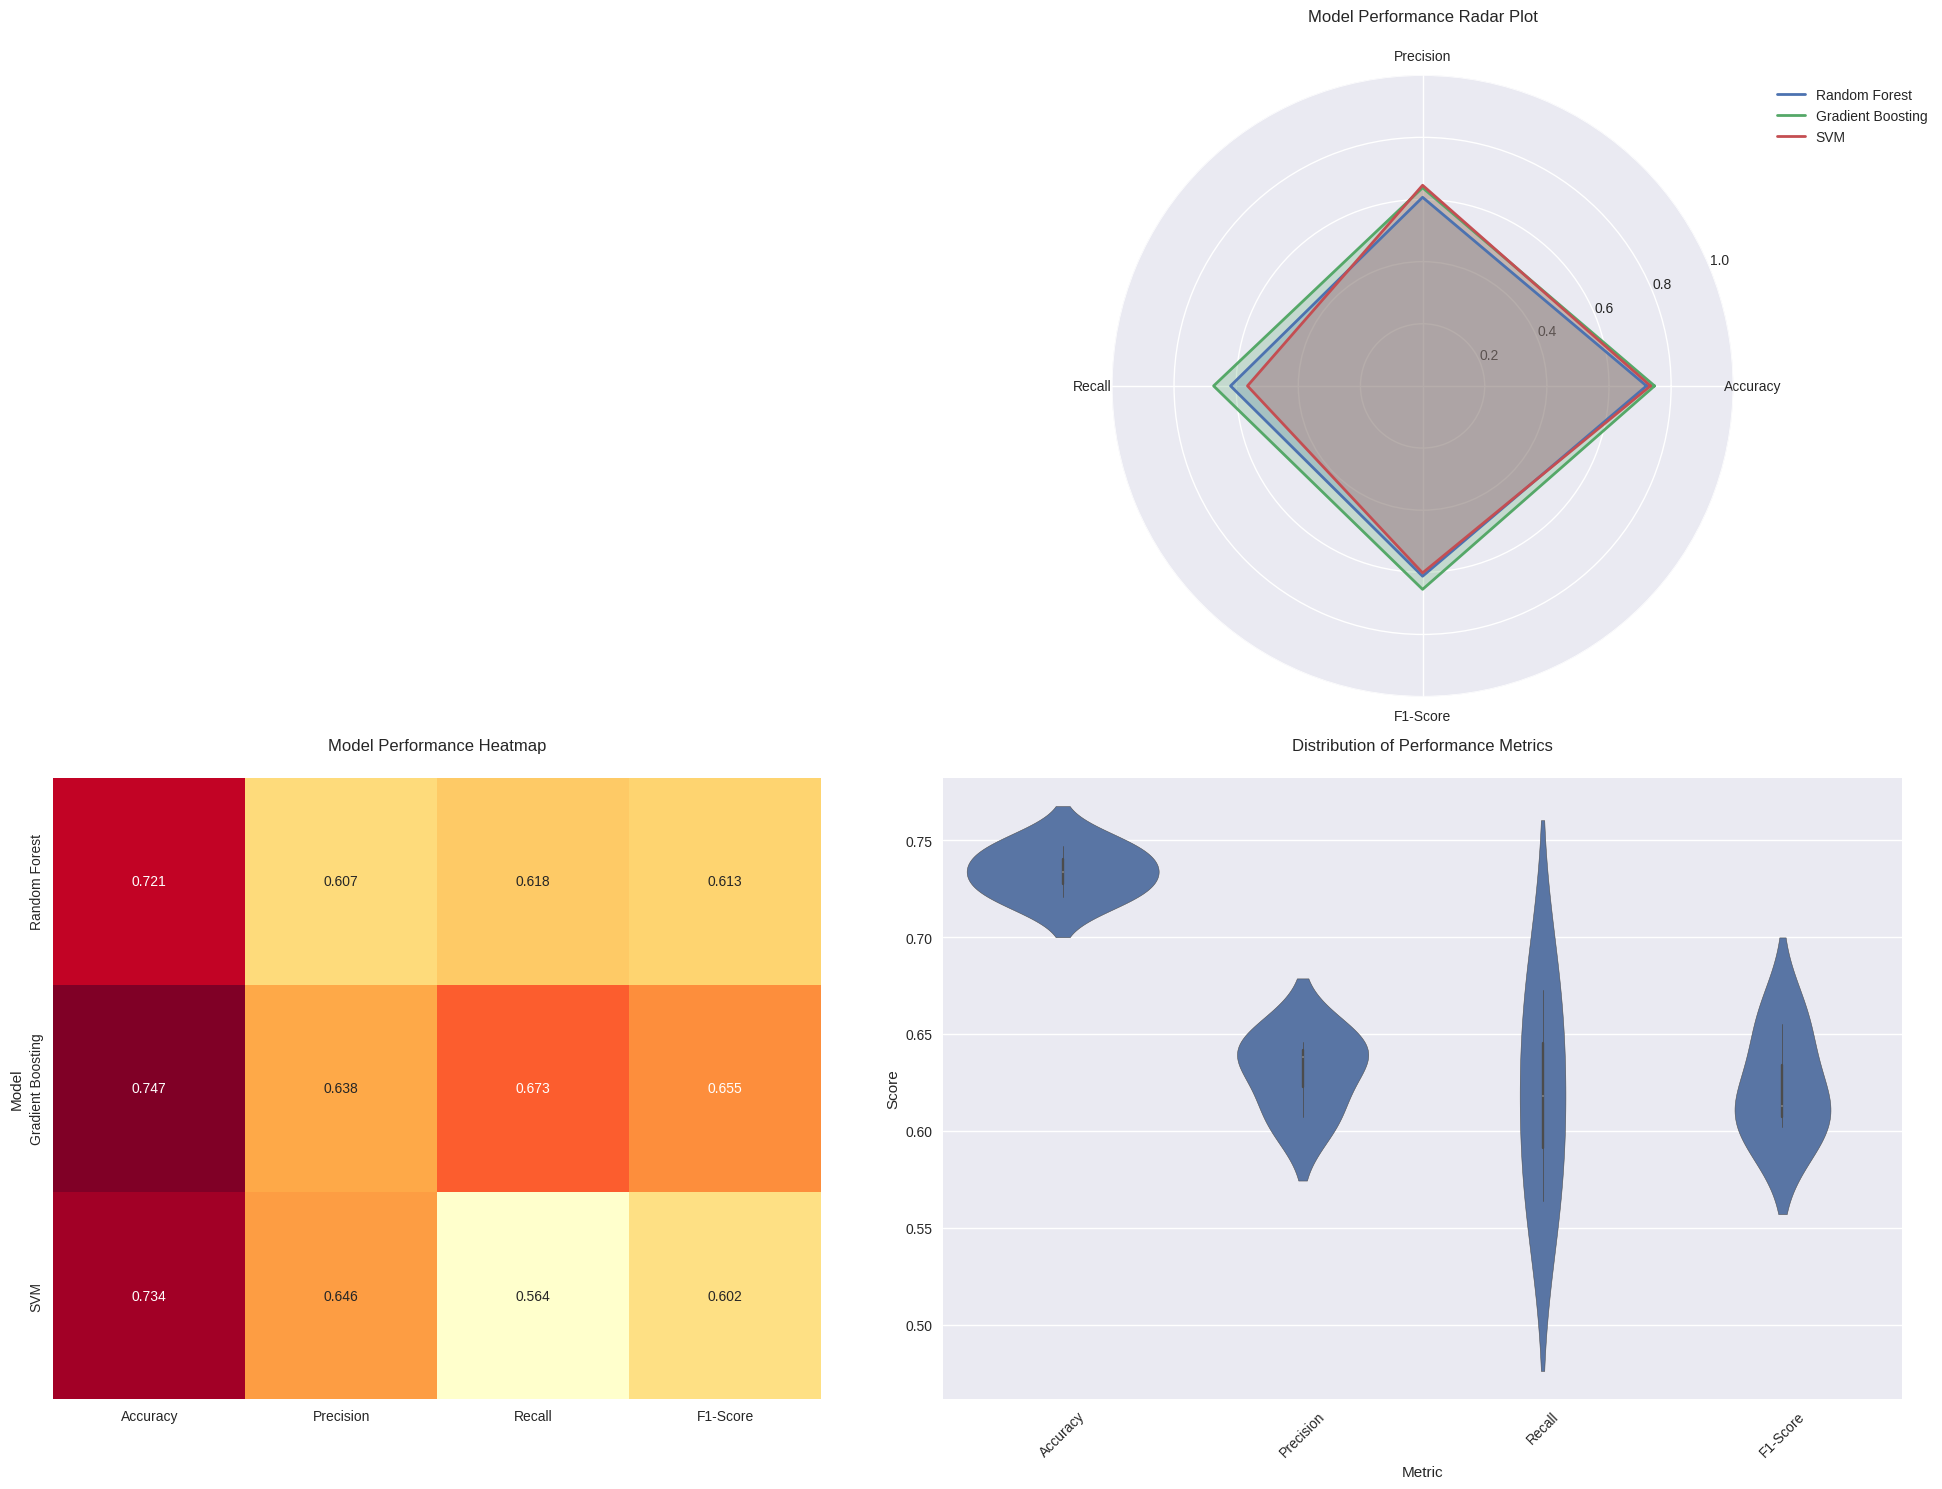

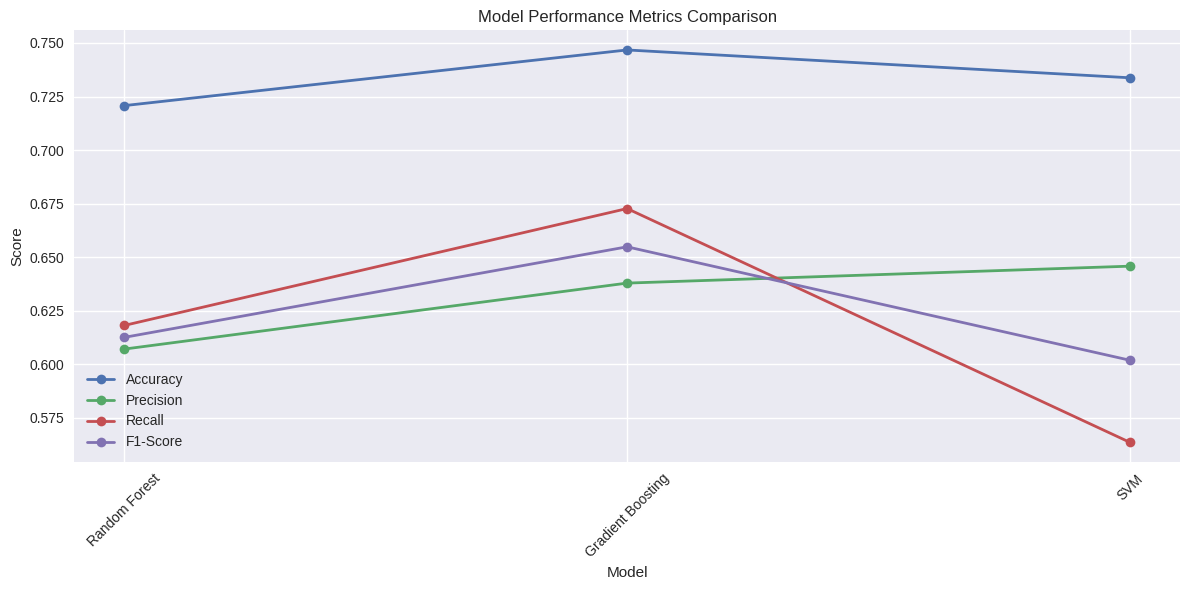

In [ ]:
metrics_data = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    metrics_data.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, zero_division=0)
    })

metrics_df = pd.DataFrame(metrics_data)

# Create visualizations
plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 15))

# 1. Bar Plot Comparison
plt.subplot(2, 2, 1)
metrics_melted = pd.melt(metrics_df, id_vars=['Model'],
                        value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
sns.barplot(x='Model', y='value', hue='variable', data=metrics_melted)
plt.title('Model Performance Metrics Comparison', pad=20)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Radar/Spider Plot
plt.subplot(2, 2, 2)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # complete the circle

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(222, projection='polar')

for model in metrics_df['Model']:
    values = metrics_df[metrics_df['Model'] == model][metrics].values.flatten()
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, '-', linewidth=2, label=model)
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
plt.title('Model Performance Radar Plot', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Heatmap
plt.subplot(2, 2, 3)
metrics_heatmap = metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']]
sns.heatmap(metrics_heatmap, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Score'})
plt.title('Model Performance Heatmap', pad=20)
plt.tight_layout()

# 4. Violin Plot
plt.subplot(2, 2, 4)
sns.violinplot(x='variable', y='value', data=metrics_melted)
plt.title('Distribution of Performance Metrics', pad=20)
plt.xticks(rotation=45)
plt.xlabel('Metric')
plt.ylabel('Score')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Additional visualization: Performance comparison line plot
plt.figure(figsize=(12, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    plt.plot(metrics_df['Model'], metrics_df[metric], marker='o', label=metric, linewidth=2)

plt.title('Model Performance Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()